In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


Load dataset

In [2]:
df = pd.read_csv("Indian_Kids_Screen_Time.csv")

In [3]:
df

,Age,Gender,Avg_Daily_Screen_Time_hr,Primary_Device,Exceeded_Recommended_Limit,Educational_to_Recreational_Ratio,Health_Impacts,Urban_or_Rural
0,14,Male,3.99,Smartphone,True,0.42,"Poor Sleep, Eye Strain",Urban
1,11,Female,4.61,Laptop,True,0.30,Poor Sleep,Urban
2,18,Female,3.73,TV,True,0.32,Poor Sleep,Urban
3,15,Female,1.21,Laptop,False,0.39,NaN,Urban
4,12,Female,5.89,Smartphone,True,0.49,"Poor Sleep, Anxiety",Urban
...,...,...,...,...,...,...,...,...
9707,17,Male,3.26,Smartphone,True,0.44,Poor Sleep,Urban
9708,17,Female,4.43,Smartphone,True,0.40,Poor Sleep,Rural
9709,16,Male,5.62,Smartphone,True,0.39,"Poor Sleep, Eye Strain, Anxiety",Rural
9710,17,Male,5.60,TV,True,0.43,Poor Sleep,Urban


Basic overview

In [4]:
df.shape
df.info()
df.describe()


<class 'pandas.DataFrame'>
RangeIndex: 9712 entries, 0 to 9711
Data columns (total 8 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                9712 non-null   int64  
 1   Gender                             9712 non-null   str    
 2   Avg_Daily_Screen_Time_hr           9712 non-null   float64
 3   Primary_Device                     9712 non-null   str    
 4   Exceeded_Recommended_Limit         9712 non-null   bool   
 5   Educational_to_Recreational_Ratio  9712 non-null   float64
 6   Health_Impacts                     6494 non-null   str    
 7   Urban_or_Rural                     9712 non-null   str    
dtypes: bool(1), float64(2), int64(1), str(4)
memory usage: 804.7 KB


,Age,Avg_Daily_Screen_Time_hr,Educational_to_Recreational_Ratio
count,9712.000000,9712.000000,9712.000000
mean,12.979201,4.352837,0.427226
std,3.162437,1.718232,0.073221
min,8.000000,0.000000,0.300000
25%,10.000000,3.410000,0.370000
50%,13.000000,4.440000,0.430000
75%,16.000000,5.380000,0.480000
max,18.000000,13.890000,0.600000


Check/handle missing,null values

In [5]:
df.isnull().sum() 
df['Health_Impacts'] = df['Health_Impacts'].fillna("Unknown")



In [16]:
df.describe(include=['object', 'string'])

,Gender,Primary_Device,Health_Impacts,Urban_or_Rural
count,9712,9712,9712,9712
unique,2,4,16,2
top,Male,Smartphone,Unknown,Urban
freq,4942,4568,3218,6851


In [17]:
df.describe(include='all')

,Age,Gender,Avg_Daily_Screen_Time_hr,Primary_Device,Exceeded_Recommended_Limit,Educational_to_Recreational_Ratio,Health_Impacts,Urban_or_Rural,Age_Group
count,9712.000000,9712,9712.000000,9712,9712,9712.000000,9712,9712,9712
unique,NaN,2,NaN,4,2,NaN,16,2,3
top,NaN,Male,NaN,Smartphone,True,NaN,Unknown,Urban,11-14
freq,NaN,4942,NaN,4568,8301,NaN,3218,6851,3539
mean,12.979201,NaN,4.352837,NaN,NaN,0.427226,NaN,NaN,NaN
std,3.162437,NaN,1.718232,NaN,NaN,0.073221,NaN,NaN,NaN
min,8.000000,NaN,0.000000,NaN,NaN,0.300000,NaN,NaN,NaN
25%,10.000000,NaN,3.410000,NaN,NaN,0.370000,NaN,NaN,NaN
50%,13.000000,NaN,4.440000,NaN,NaN,0.430000,NaN,NaN,NaN
75%,16.000000,NaN,5.380000,NaN,NaN,0.480000,NaN,NaN,NaN


Create Age Groups

In [18]:
df['Health_Impacts'].unique()

<ArrowStringArray>
[                       'Poor Sleep, Eye Strain',
                                    'Poor Sleep',
                                       'Unknown',
                           'Poor Sleep, Anxiety',
                      'Poor Sleep, Obesity Risk',
                                    'Eye Strain',
                                  'Obesity Risk',
                                       'Anxiety',
             'Poor Sleep, Anxiety, Obesity Risk',
                      'Eye Strain, Obesity Risk',
             'Eye Strain, Anxiety, Obesity Risk',
                         'Anxiety, Obesity Risk',
          'Poor Sleep, Eye Strain, Obesity Risk',
               'Poor Sleep, Eye Strain, Anxiety',
 'Poor Sleep, Eye Strain, Anxiety, Obesity Risk',
                           'Eye Strain, Anxiety']
Length: 16, dtype: str

In [6]:
bins = [0, 6, 10, 14, 18]
labels = ['0-6', '7-10', '11-14', '15-18']

df['Age_Group'] = pd.cut(df['Age'], bins=bins, labels=labels)


In [7]:
df[['Age', 'Age_Group']].head()


,Age,Age_Group
0,14,11-14
1,11,11-14
2,18,15-18
3,15,15-18
4,12,11-14


EDA Visualizations

1. Screen time distribution

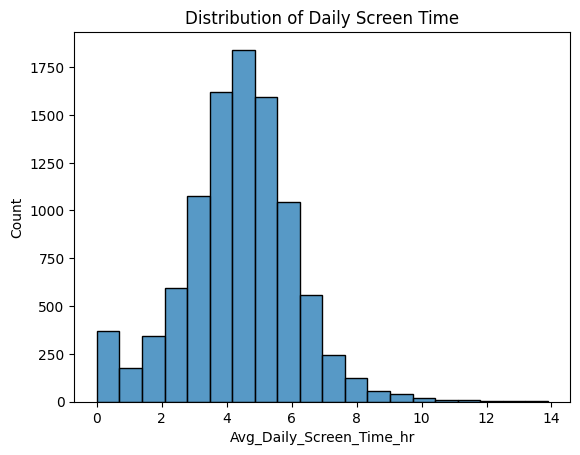

In [8]:
sns.histplot(df['Avg_Daily_Screen_Time_hr'], bins=20)
plt.title("Distribution of Daily Screen Time")
plt.show()


2. Screen time by gender

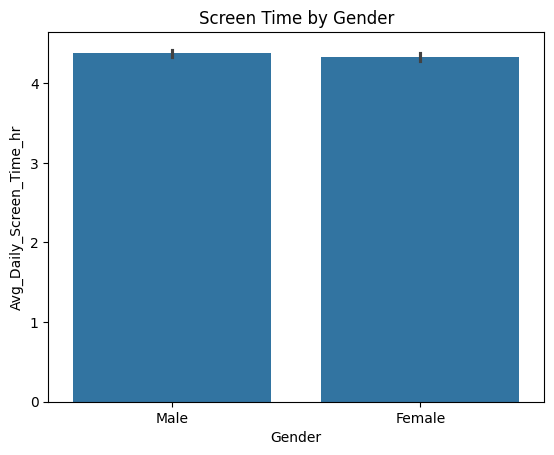

In [9]:
sns.barplot(x='Gender', y='Avg_Daily_Screen_Time_hr', data=df)
plt.title("Screen Time by Gender")
plt.show()


3.Device usage

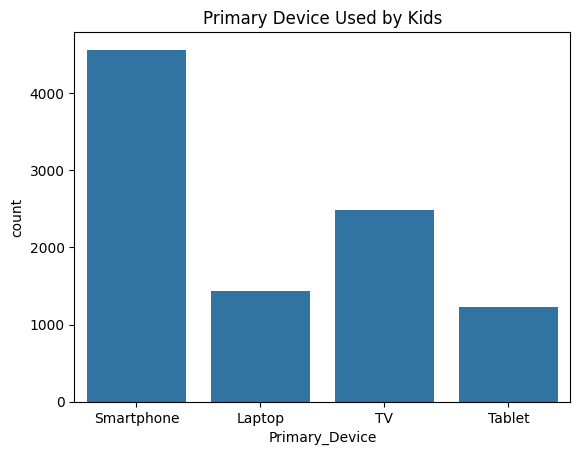

In [10]:
sns.countplot(x='Primary_Device', data=df)
plt.title("Primary Device Used by Kids")
plt.show()


4.Screen time by age group

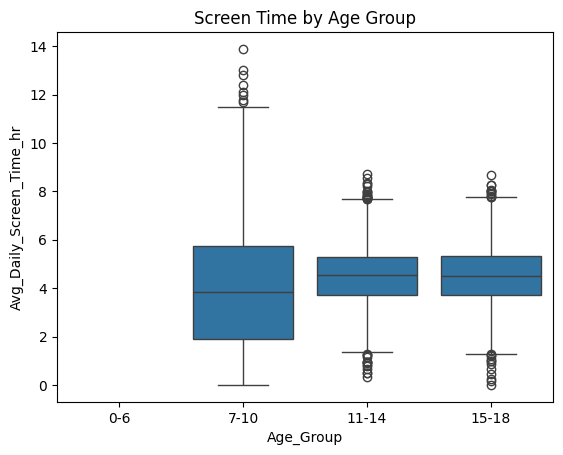

In [11]:
sns.boxplot(x='Age_Group', y='Avg_Daily_Screen_Time_hr', data=df)
plt.title("Screen Time by Age Group")
plt.show()


5. Urban vs Rural screen time

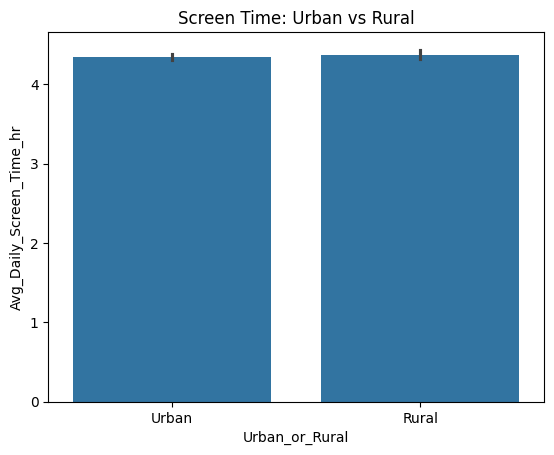

In [12]:
sns.barplot(x='Urban_or_Rural', y='Avg_Daily_Screen_Time_hr', data=df)
plt.title("Screen Time: Urban vs Rural")
plt.show()


6. Exceeded recommended limit

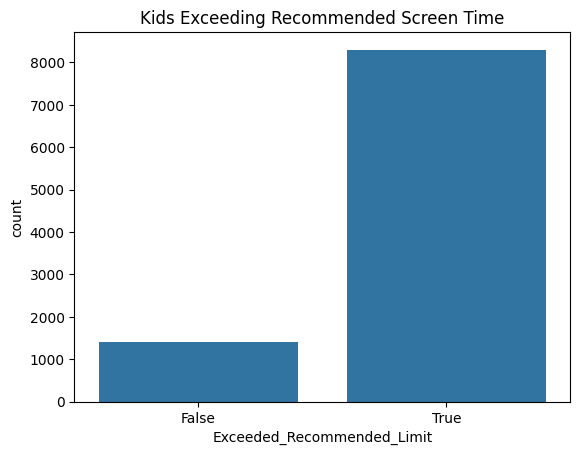

In [13]:
sns.countplot(x='Exceeded_Recommended_Limit', data=df)
plt.title("Kids Exceeding Recommended Screen Time")
plt.show()


7. Correlation heatmap

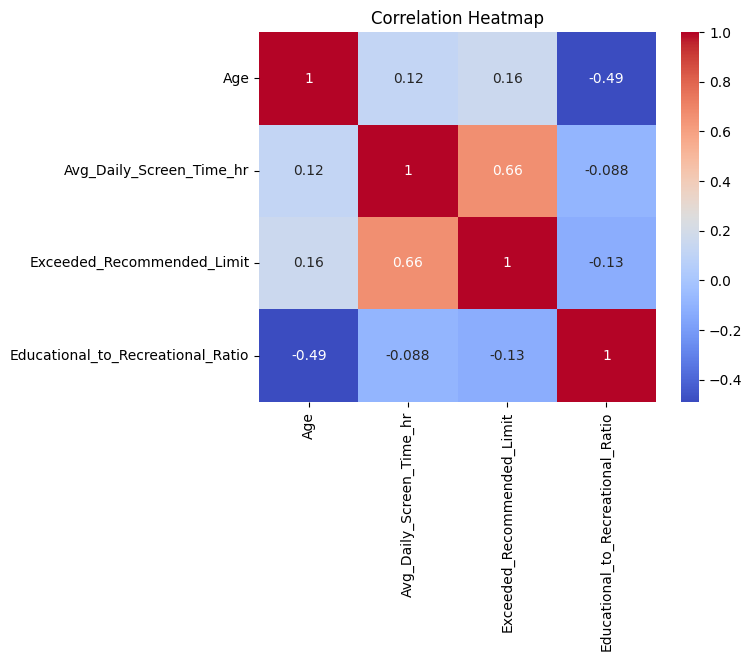

In [14]:
corr = df.corr(numeric_only=True)

sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


# Bivariant Analysis

In [19]:
pd.crosstab(df['Gender'], df['Urban_or_Rural'], normalize='index') * 100

Urban_or_Rural,Rural,Urban
Gender,,
Female,29.559748,70.440252
Male,29.360583,70.639417


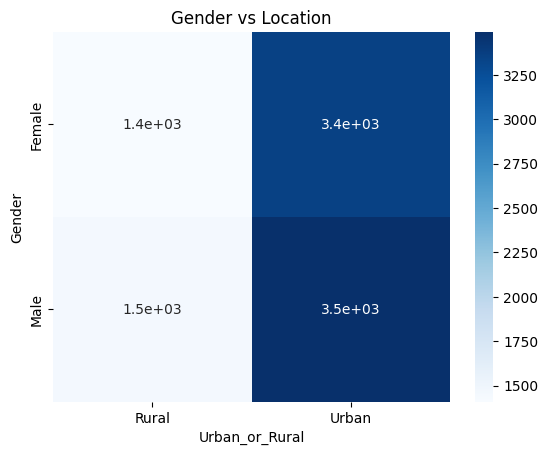

In [20]:
ct = pd.crosstab(df['Gender'], df['Urban_or_Rural'])

sns.heatmap(ct, annot=True, cmap='Blues')
plt.title("Gender vs Location")
plt.show()